In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ecommerce_df=pd.read_csv('Ecommerce_Delivery_Analytics_New.csv')

ecommerce_df['Product Category'].value_counts().index

Index(['Dairy', 'Grocery', 'Snacks', 'Fruits & Vegetables', 'Beverages',
       'Personal Care'],
      dtype='object', name='Product Category')

In [6]:
# Check for missing values in key columns like 'Delivery Time (Minutes)', 'Order Value (INR)', 'Service Rating'
ecommerce_df[['Delivery Time (Minutes)','Order Value (INR)','Service Rating']].isnull().sum()

Delivery Time (Minutes)    0
Order Value (INR)          0
Service Rating             0
dtype: int64

In [10]:
# Standardize categorical values in 'Delivery Delay' and 'Refund Requested' (e.g., convert 'Yes'/'No' to True/False)
ecommerce_df[['Delivery Delay','Refund Requested']]

ecommerce_df[['Delivery Delay','Refund Requested']].replace(to_replace=['No','Yes'], value=['False','True'])

,Delivery Delay,Refund Requested
0,False,False
1,False,False
2,False,True
3,True,True
4,False,False
...,...,...
99995,False,False
99996,False,False
99997,True,False
99998,False,False


In [14]:
# Ensure numeric types for 'Order Value (INR)', 'Service Rating', and 'Delivery Time (Minutes)'

ecommerce_df[['Order Value (INR)','Service Rating','Delivery Time (Minutes)']].dtypes

Order Value (INR)          int64
Service Rating             int64
Delivery Time (Minutes)    int64
dtype: object

In [179]:
# Strip whitespace and standardize casing in 'Platform' and 'Product Category'

# this cleans up the data which have extra spaces and makes standarize casing 

ecommerce_df['Platform']=ecommerce_df['Platform'].str.strip().str.title()
ecommerce_df['Product Category']=ecommerce_df['Product Category'].str.strip().str.title()

ecommerce_df[['Product Category','Platform']]

/var/folders/95/9nk4v10n4_x4yb1czsh8bwfm0000gn/T/ipykernel_3301/2896799267.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecommerce_df['Platform']=ecommerce_df['Platform'].str.strip().str.title()
/var/folders/95/9nk4v10n4_x4yb1czsh8bwfm0000gn/T/ipykernel_3301/2896799267.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecommerce_df['Product Category']=ecommerce_df['Product Category'].str.strip().str.title()


,Product Category,Platform
0,Fruits & Vegetables,Jiomart
1,Dairy,Blinkit
2,Beverages,Jiomart
3,Beverages,Jiomart
4,Beverages,Blinkit
...,...,...
67051,Snacks,Blinkit
70641,Snacks,Blinkit
70768,Dairy,Blinkit
74929,Personal Care,Blinkit


In [185]:
# Which product categories generate the highest total revenue ?

# grouping the series to identify the Highest revenue generated by the product categories

new_data= (
    ecommerce_df.groupby('Product Category')['Order Value (INR)'].sum()
    .reset_index(name='Highest Revenue')
    .sort_values(by='Highest Revenue', ascending= False)
)
new_data = new_data.set_index('Product Category')
new_data

,Highest Revenue
Product Category,
Personal Care,1535431
Grocery,1311822
Beverages,830923
Dairy,689273
Fruits & Vegetables,542366
Snacks,417053


Text(0, 0.5, 'Highest Revenue (INR)')

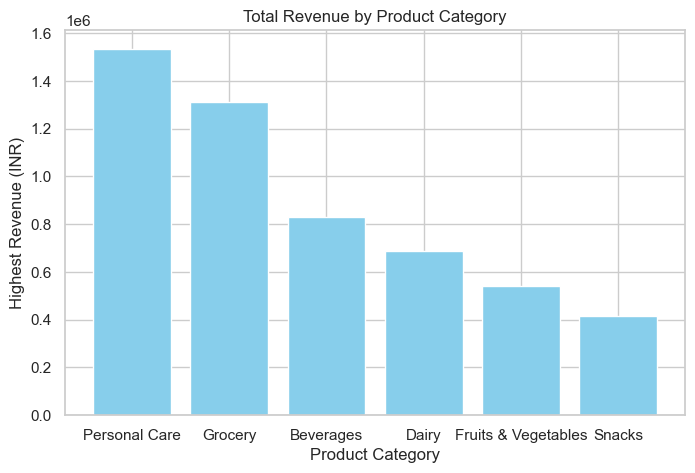

In [190]:
# Bar chart showing total revenue per product category.

import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(new_data.index, new_data['Highest Revenue'], color='skyblue')
plt.title('Total Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Highest Revenue (INR)')

In [70]:
# What is the distribution of Products across different platforms?

ecommerce_df[['Product Category','Platform']] # inspecting the series 

#grouping by the series to see which Platform has the highest Sales 

platform_df=(
    ecommerce_df.groupby(['Platform','Product Category']).size()
    .reset_index(name='Order count')
)
platform_df

,Platform,Product Category,Order count
0,Blinkit,Beverages,5593
1,Blinkit,Dairy,5643
2,Blinkit,Fruits & Vegetables,5576
3,Blinkit,Grocery,5586
4,Blinkit,Personal Care,5463
5,Blinkit,Snacks,5563
6,Jiomart,Beverages,5411
7,Jiomart,Dairy,5586
8,Jiomart,Fruits & Vegetables,5546
9,Jiomart,Grocery,5605


In [191]:
# Create a summary table: Orders, delays, refunds, and average rating per product category

summary_df = ecommerce_df.groupby('Product Category').agg(
    Orders=('Order ID', 'count'),
    Delays=('Delivery Delay', lambda x: (x == 'Yes').sum()),
    Refunds=('Refund Requested', lambda x: (x == 'Yes').sum()),
    Avg_Rating=('Service Rating', 'mean')
).reset_index()

summary_df

,Product Category,Orders,Delays,Refunds,Avg_Rating
0,Beverages,1507,191,681,3.258129
1,Dairy,1513,208,690,3.245869
2,Fruits & Vegetables,1460,231,672,3.258219
3,Grocery,1528,201,727,3.202880
4,Personal Care,1462,230,658,3.257866
5,Snacks,1530,215,724,3.206536


In [66]:
#Group and count orders by Platform and Product Category
category_counts = ecommerce_df.groupby(['Platform', 'Product Category']).size().reset_index(name='Order Count')

category_counts

,Platform,Product Category,Order Count
0,Blinkit,Beverages,5593
1,Blinkit,Dairy,5643
2,Blinkit,Fruits & Vegetables,5576
3,Blinkit,Grocery,5586
4,Blinkit,Personal Care,5463
5,Blinkit,Snacks,5563
6,Jiomart,Beverages,5411
7,Jiomart,Dairy,5586
8,Jiomart,Fruits & Vegetables,5546
9,Jiomart,Grocery,5605


In [203]:
# How many unique customers are there?

ecommerce_df

In [223]:
# What is the average order value per platform?

ecommerce_df.groupby('Platform')['Order Value (INR)'].mean()

Platform
Blinkit             594.687908
JioMart             593.583949
Swiggy Instamart    587.248481
Name: Order Value (INR), dtype: float64

In [82]:
# What is the most frequently used platform?

# grouping the columnns to calculate the most frequently used platform
platform_df=(
    ecommerce_df.groupby('Platform')
    .size()
    .reset_index(name='Most used platforms')
    .sort_values(by='Most used platforms', ascending= False)
)
# reseting the index with '0'
platform_df.reset_index(drop=True)

,Platform,Most used platforms
0,Swiggy Instamart,33449
1,Blinkit,33424
2,Jiomart,33127


In [83]:
# What is the overall average delivery time by the products on different platforms?

Delivery_time = (
    ecommerce_df.groupby(['Platform','Product Category'])['Delivery Time (Minutes)']
    .mean()
    .reset_index(name='Avg Delivery Time')
    .sort_values(by='Avg Delivery Time', ascending= True)
)
Delivery_time.reset_index(drop=True)

,Platform,Product Category,Avg Delivery Time
0,Blinkit,Snacks,29.269818
1,Blinkit,Fruits & Vegetables,29.276004
2,Swiggy Instamart,Beverages,29.317607
3,Swiggy Instamart,Personal Care,29.336528
4,Blinkit,Grocery,29.448264
5,Blinkit,Dairy,29.512493
6,Jiomart,Snacks,29.523182
7,Swiggy Instamart,Snacks,29.552599
8,Swiggy Instamart,Grocery,29.564190
9,Blinkit,Beverages,29.574647


In [86]:
# What is the median order value?
ecommerce_df['Order Value (INR)'].median()

479.0

In [227]:
# How many orders have an order value greater than 1,500?
ecommerce_df[ecommerce_df['Order Value (INR)']>1500][['Customer ID','Product Category','Platform','Order Value (INR)']]

,Customer ID,Product Category,Platform,Order Value (INR)
5,CUST3286,Personal Care,Blinkit,1939
6,CUST2679,Personal Care,JioMart,1693
31,CUST2674,Personal Care,JioMart,1651
64,CUST3803,Personal Care,Swiggy Instamart,1595
65,CUST9751,Personal Care,Swiggy Instamart,1956
...,...,...,...,...
40978,CUST2239,Personal Care,Swiggy Instamart,1864
42022,CUST6541,Personal Care,Swiggy Instamart,1951
47085,CUST8188,Personal Care,Swiggy Instamart,1764
48429,CUST3629,Personal Care,Blinkit,1978


In [88]:
#What is the average customer feedback score?
ecommerce_df['Service Rating'].mean()

3.237888888888889

In [81]:
#Which product category has the lowest average feedback?
ecommerce_df.sort_values(by='Customer Feedback', ascending= True)[['Product Category','Platform','Service Rating','Customer Feedback']]

,Product Category,Platform,Service Rating,Customer Feedback
14354,Beverages,Blinkit,2,Delivery person was rude.
20913,Personal Care,Swiggy Instamart,2,Delivery person was rude.
20919,Snacks,Blinkit,2,Delivery person was rude.
47782,Beverages,Jiomart,2,Delivery person was rude.
5705,Grocery,Blinkit,2,Delivery person was rude.
...,...,...,...,...
25824,Beverages,Swiggy Instamart,1,Wrong item delivered.
86599,Grocery,Swiggy Instamart,1,Wrong item delivered.
16030,Grocery,Jiomart,1,Wrong item delivered.
93405,Personal Care,Jiomart,1,Wrong item delivered.


In [122]:
# Create a summary table: Orders, delays, refunds, and average rating per product category

summary_table= ecommerce_df.groupby('Product Category').agg(
         Orders=('Order ID', 'count'),
    Delays=('Delivery Delay', lambda x: (x == 'Yes').sum()),
    Refunds=('Refund Requested', lambda x: (x == 'Yes').sum()),
    Avg_Rating=('Service Rating', 'mean')
    ).reset_index()

#summary_table
ecommerce_df.columns

Index(['Order ID', 'Customer ID', 'Platform', 'Order Date & Time',
       'Delivery Time (Minutes)', 'Product Category', 'Order Value (INR)',
       'Customer Feedback', 'Service Rating', 'Delivery Delay',
       'Refund Requested'],
      dtype='object')

In [143]:
#For each platform, how many orders were delayed and delivered on time, and what is the average delivery time?

Products_delivery_status=ecommerce_df.groupby(['Platform','Product Category']).agg(
    Orders=('Order ID', 'count'),
    Delayed=('Delivery Delay', lambda x: (x == 'Yes').sum()),
    On_Time=('Delivery Delay', lambda x: (x == 'No').sum()),
    Avg_Delivery_Time=('Delivery Time (Minutes)', 'mean')
).reset_index().sort_values(by='Avg_Delivery_Time', ascending= False)

Products_delivery_status

,Platform,Product Category,Orders,Delayed,On_Time,Avg_Delivery_Time
4,Blinkit,Personal Care,503,82,421,30.202783
17,Swiggy Instamart,Snacks,502,80,422,30.143426
13,Swiggy Instamart,Dairy,521,83,438,30.082534
14,Swiggy Instamart,Fruits & Vegetables,471,77,394,29.985138
2,Blinkit,Fruits & Vegetables,503,77,426,29.922465
9,Jiomart,Grocery,533,76,457,29.784240
3,Blinkit,Grocery,503,64,439,29.727634
8,Jiomart,Fruits & Vegetables,486,77,409,29.553498
11,Jiomart,Snacks,497,78,419,29.529175
10,Jiomart,Personal Care,479,80,399,29.411273


In [145]:
# Which platform has the highest proportion of high-value orders?

new_data= (
    ecommerce_df.groupby(['Platform'])['Order Value (INR)'].sum()
    .reset_index(name='Highest Revenue')
    .sort_values(by='Highest Revenue', ascending= False)
)
new_data 

,Platform,Highest Revenue
0,Blinkit,1819745
1,Jiomart,1767693
2,Swiggy Instamart,1739430


<Axes: xlabel='Platform', ylabel='Service Rating'>

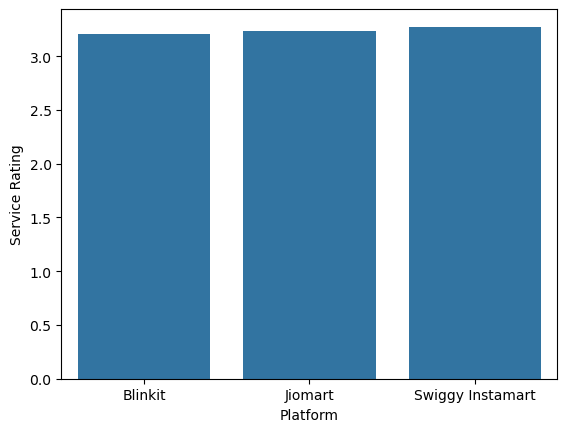

In [156]:
# Bar chart: Average service rating by platform

avg_rating_platform= (
    ecommerce_df.groupby('Platform')['Service Rating']
    .mean()
    .reset_index()
)
sns.barplot(data=avg_rating_platform,x='Platform',y='Service Rating')

In [159]:
avg_rating_platform.sort_values(by='Service Rating',ascending=False)

,Platform,Service Rating
2,Swiggy Instamart,3.274477
1,Jiomart,3.231363
0,Blinkit,3.208824


Text(0.5, 1.0, 'Share of Delayed vs. On-Time Deliveries')

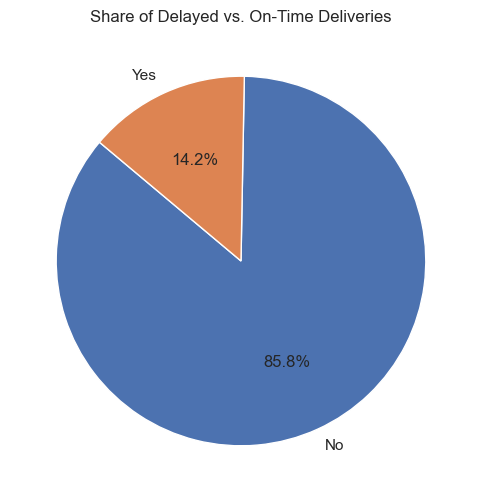

In [178]:
# Pie chart: Share of delayed vs. on-time deliveries

# Count delayed and on-time deliveries
delivery_counts = ecommerce_df['Delivery Delay'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    delivery_counts,
    labels=delivery_counts.index,
    autopct='%1.1f%%',
    startangle=140,
)
plt.title('Share of Delayed vs. On-Time Deliveries')


([0, 1, 2],
 [Text(0, 0, 'Jiomart'),
  Text(1, 0, 'Blinkit'),
  Text(2, 0, 'Swiggy Instamart')])

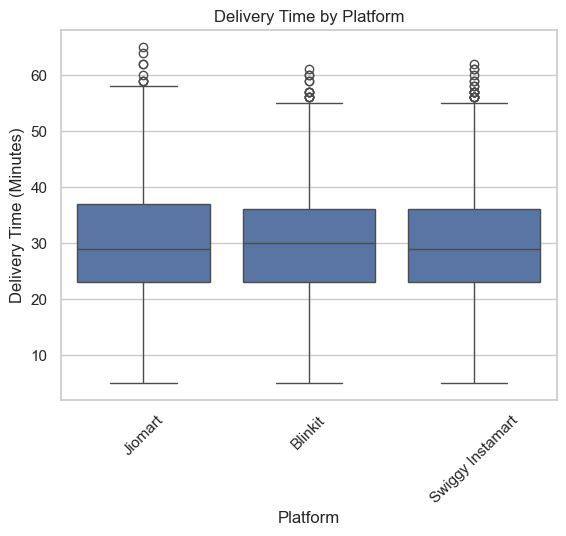

In [169]:
# Box Plot of Delivery Time by Platform

sns.boxplot(data=ecommerce_df, x='Platform', y='Delivery Time (Minutes)')

# Add title and labels
plt.title('Delivery Time by Platform')
plt.xlabel('Platform')
plt.ylabel('Delivery Time (Minutes)')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Delivery time by Product category')

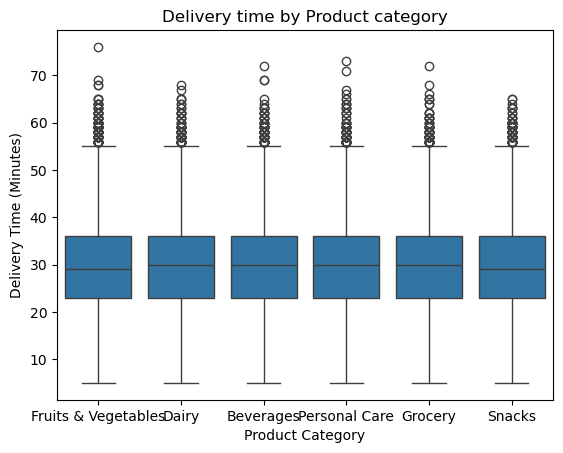

In [3]:
# How does delivery time vary by product category?

sns.boxplot(data=ecommerce_df, x='Product Category', y='Delivery Time (Minutes)')

plt.title('Delivery time by Product category')